# Problem statement
The goal of this project is to develop a predictive model to accurately identify the likelihood of hotel booking cancellations using historical booking data. This will help the company anticipate cancellations and implement effective strategies to minimize their negative impact on revenue, resource allocation, and customer satisfaction.

# Problem Introduction
Booking cancellations are a significant challenge for the hospitality industry. For hotel chains operating globally, understanding and predicting booking cancellations is crucial to optimizing operations and maximizing revenue. Each canceled booking represents lost potential revenue and complicates resource allocation, including room availability, staffing, and inventory management.

In this project, the target variable is is_canceled, which indicates whether a booking has been canceled (1) or confirmed (0). Predictive modeling on the dataset, which includes 119,390 records of past hotel bookings, will enable the company to anticipate cancellations and implement strategies to mitigate their impact.

# Motivation
- Revenue Management: Booking cancellations affect the bottom line due to missed revenue opportunities. Accurate predictions will enable overbooking strategies to be employed effectively, minimizing financial loss.
- Operational Efficiency: Staff scheduling, room preparation, and supply chain management depend on reliable booking data. Anticipating cancellations allows hotels to allocate resources more efficiently.
- Customer Experience: Predictive insights can guide tailored communication with guests, offering personalized reminders or incentives to reduce cancellations. This improves customer satisfaction and loyalty.
- Competitive Edge: In a highly competitive market, being proactive about cancellations sets the company apart, resulting in better utilization of resources, higher profitability, and customer retention.

# Objective 
The primary objective of this project is to develop a data-driven solution to predict hotel booking cancellations with high accuracy. This involves:
- Identifying key factors contributing to cancellations.
- Building a predictive model to classify bookings as canceled or not canceled (is_canceled).
- Providing actionable recommendations to minimize cancellations and optimize business operations.ons.

# Business Impact
- Revenue Optimization
Overbooking Strategies: Accurate predictions allow the hotel to implement optimal overbooking strategies to counter potential cancellations, ensuring maximum room utilization and revenue generation.
Reduced Losses: Minimizing cancellations reduces financial losses due to unused inventory and associated opportunity costs.
- Operational Efficiency
Resource Allocation: Insights into likely cancellations allow better scheduling of staff and preparation of rooms, leading to improved operational efficiency.
Inventory Management: Predicting cancellations helps manage inventory for food, amenities, and other hotel resources more effectively.
- Improved Customer Experience
Personalized Engagement: With predictive insights, hotels can identify guests at higher risk of cancellation and intervene with tailored communication, reminders, or offers, improving the likelihood of retention.
Enhanced Loyalty: Providing a seamless booking experience and proactive support boosts guest satisfaction and loyalty.
- Strategic Decision-Making
Dynamic Pricing: Understanding cancellation trends can inform dynamic pricing strategies, helping the hotel to adjust rates in real time to maximize revenue.
Market Competitiveness: Predictive insights and optimized resource management help the hotel stay ahead of competitors in a highly competitive market.













In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


writing down the path of the dataset to import it

In [2]:
path = 'C:\\Users\\Gahan\\Downloads\\hotel_bookings.csv'

# Data Collection
Loading the dataset and displaying it

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


# Data Exploration and Understanding
Displaying shape and statistical summary of the data

In [5]:
print("Data Shape:", df.shape)

Data Shape: (119390, 30)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Cleaning or Preprocessing
Performing data preprocessing steps. Here we are checking for null values.

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

from the above data, we can see that there are null values present in the dataset.

we are handling the null values by imputing the numerical columna with mean and non-numeric with 'unknown'.

In [10]:
# imputing numeric columns with the mean and non-numeric with 'Unknown'
fill_values = {}
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['float64', 'int64']:
            fill_values[col] = df[col].mean()  
        else:
            fill_values[col] = 'Unknown'  

# Fill missing values for all columns at once
df.fillna(value=fill_values, inplace=True)


In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

we are converting date to datetime object

In [12]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str))
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_weekday'] = df['arrival_date'].dt.weekday


we are dropping the unhelpful columns

In [14]:
#drop unhelpful columns
columns_to_drop = ['arrival_date', 'reservation_status_date']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

here we are performing categorical encoding for the categorical columns

In [18]:
#categorical encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [19]:
df.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,737,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,7,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False


# Modelling

# Data Splitting
Here we are performing the train test split and also dividing the target variable from the dataset in order to train the model.

In [20]:
# Define features and target
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [21]:
X.head(5)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,737,2015,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,7,2015,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,13,2015,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,14,2015,27,1,0,2,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [22]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

Here we are splitting the dataset into train and test. 80 percent of the data is given for training while 20 percent of the data is used for testing.

In [23]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

here, we are standardizing the numerical data for better fit

In [24]:
# Standardizing numerical features for distance-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection
Here the model selection is performed. fiest we are selecting the evaluation or performance metrics. we have selected the Logistic Regression,  Random Forest Regressor, XGBoost, KNN models to perform the training and testing.

In [25]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    return metrics, confusion_matrix(y_test, y_pred)

# Model Training
here, we are training the model and calculating the training time as well

In [50]:
#logistic regression
import time
log_reg = LogisticRegression(max_iter=10000)
# Start the timer
start_time = time.time()
log_metrics, log_cm = evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)
# Stop the timer
end_time = time.time()

# Calculate training time
log_training_time = end_time - start_time
print(f"Model training time: {training_time:.2f} seconds")


Model training time: 66.51 seconds


In [51]:
# Random Forest
import time
rf = RandomForestClassifier(random_state=42)

# Start the timer
start_time = time.time()

# Train the model
rf_metrics, rf_cm = evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test)

# Stop the timer
end_time = time.time()

# Calculate training time
rf_training_time = end_time - start_time
print(f"Model training time: {training_time:.2f} seconds")


Model training time: 66.51 seconds


In [52]:
# XGBoost
xgb = XGBClassifier( eval_metric='logloss', random_state=42)
start_time = time.time()
xgb_metrics, xgb_cm = evaluate_model(xgb, X_train_scaled, y_train, X_test_scaled, y_test)
end_time = time.time()

# Calculate training time
xgb_training_time = end_time - start_time
print(f"Model training time: {training_time:.2f} seconds")


Model training time: 66.51 seconds


In [54]:
# kNN
knn = KNeighborsClassifier(n_neighbors=5)
start_time=time.time()
knn_metrics, knn_cm = evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test)
end_time = time.time()

# Calculate training time
knn_training_time = end_time - start_time
print(f"Model training time: {training_time:.2f} seconds")


Model training time: 66.51 seconds


# Models Comparison
# Model Evaluation
here we are evaluating the performance metrics of all the 4 models and making an comparison between them

In [33]:
# Model Comparison
metrics_df = pd.DataFrame({
    'Logistic Regression': log_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'kNN': knn_metrics
}).T

print(metrics_df)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.818662   0.811336  0.665122  0.730989  0.896321
Random Forest        0.893835   0.896556  0.806444  0.849116  0.958322
XGBoost              0.877837   0.858317  0.802713  0.829585  0.952225
kNN                  0.822514   0.768067  0.746184  0.756968  0.888379


In [56]:
print("logistic regression training time is:", log_training_time)
print("random forest training time is:", rf_training_time)
print("XGBoost training time is:", xgb_training_time)
print("KNN training time is:", knn_training_time)

logistic regression training time is: 3.7937464714050293
random forest training time is: 54.05463457107544
XGBoost training time is: 3.5451371669769287
KNN training time is: 66.03842687606812


# Displaying the Results in the form of Confusion Matrix

Confusion Matrix for Logistic Regression is:


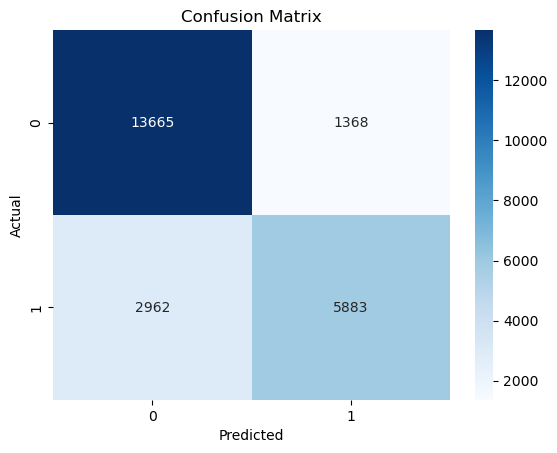

In [38]:
print("Confusion Matrix for Logistic Regression is:" )
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix for Random Forest is:


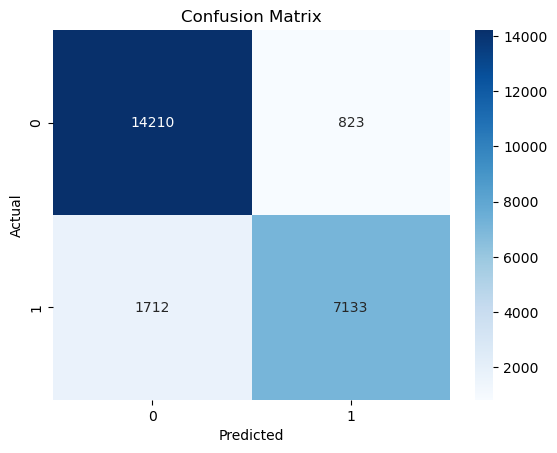

In [41]:
print("Confusion Matrix for Random Forest is:" )
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix for XGBoost is:


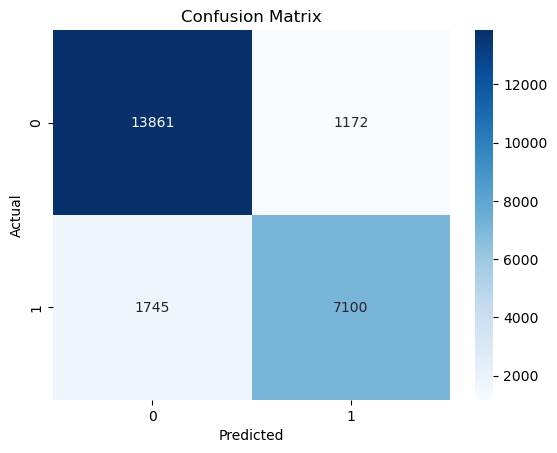

In [42]:
print("Confusion Matrix for XGBoost is:" )
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix for K-Nearest Neighbor is:


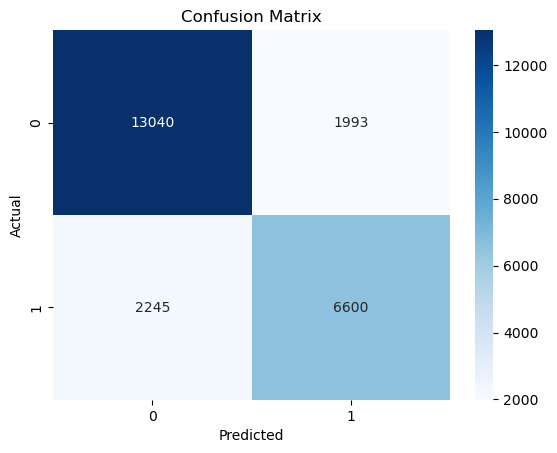

In [43]:
print("Confusion Matrix for K-Nearest Neighbor is:" )
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Final Selection of the 'Winning' Method

Based on model evaluation, the best-performing method is selected using the following criteria:
- Accuracy: How well the model predicts booking cancellations.
- Precision & Recall: Critical in minimizing false positives (overestimating cancellations) and false negatives (underestimating cancellations).
- F1 Score: A balance between precision and recall.
- Run-Time Efficiency: How quickly the model trains and predicts.
Therefore, based on the above metrics the winning method is RandomForest beacause:
- Best Overall Performance: Highest accuracy (89.38%), precision (89.66%), and F1-score (84.91%) among all models.
- Excellent ROC-AUC (95.83%): Reflects its ability to distinguish between cancellations and non-cancellations.
- Interpretability: It provides feature importance, aiding in actionable insights.
While XGBoost had a comparable performance with lower training time, Random Forest achieved slightly better results, justifying the longer training time.

# Minimum Required Data
# Key Features for Random Forest:
- lead_time
- deposit_type
- previous_cancellations
- booking_changes
- is_repeated_guest
- adr (average daily rate)
# Dataset Size:
A dataset with at least 10,000 records is recommended to ensure the model learns patterns effectively.Ensure a balanced distribution of cancellations (is_canceled) to avoid bias.
# Run-Time Information
# Training Time:
- Random Forest training time: ~54 seconds (on your system).
- Suitable for periodic retraining, e.g., weekly or monthly, rather than in real-time.
# Prediction Time:
Random Forest predictions are fast and can operate in near-real-time (~milliseconds per record), making it practical for deployment.for deployment.

# What can they do or should they do with the model you have provided? 
# Deployment:
- Integrate the Random Forest model into the booking system to predict cancellations.
- Automate reminders or incentives for customers flagged as high-risk for cancellations.
# Insights from the Model:
- Use feature importance to focus on factors like lead time and deposit type. For example:
- Encourage early bookings by reducing lead times.
- Offer flexible deposit policies to reduce cancellations.
# Monitoring and Maintenance:
- Regularly retrain the model with updated data to account for seasonality and booking behavior trends.
- Monitor model performance (e.g., precision, recall) post-deployment.


# Do you have any concerns about the data or classification model?
# Data Quality:
- Missing or inconsistent data might reduce model accuracy.
- Ensure accurate recording of features like lead_time and deposit_type.
# Bias:
- If the dataset predominantly represents a specific type of hotel or region, the model might not generalize well to others.
- Regularly evaluate the model's performance across different customer segments.
# Run-Time Costs:
- Random Forest's training time is relatively long. If frequent retraining is required, consider using XGBoost as an alternative.